In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import sys
import pickle
import time

from invisible_cities.core .configure     import            configure
from invisible_cities.icaro.hst_functions import shift_to_bin_centers

from invisible_cities.io.mcinfo_io            import *
from invisible_cities.reco.paolina_functions  import *

In [2]:
CanfrancFlux=5.8*10**-7 #muons/cm2/s
GranSassoFlux=3.41*10**-8 #muons/cm2/s
CanfrancFluxYear=5.8*10**-7*(260*260)*31536000 #muons/year (using crosssectional area of tonne detector)
GranSassoFluxYear=3.41*10**-8*(260*260)*31536000
print(GranSassoFluxYear)

72695.52576


In [3]:
clrs= ['darkmagenta','deepskyblue','violet','mediumpurple',"rebeccapurple"]
palette = plt.get_cmap('Paired')



In [4]:
locat = '/users/rogerslc/MuonData/'

#done for 1tonne geometry that Austin is using

nrgofneutroncaptured = pd.read_hdf(locat+'neutron_capture_nrgs_from_sim7879000muons.h5')
muonnrgsproducingXe137=pd.read_hdf(locat+'nrgsofmuonsthatresultinXe137_sim7879000muons.h5')

In [331]:
np.sum(binned_Xe137data[0]/binned_nrgs[0])

0.002296476881116383

18093.798357830117


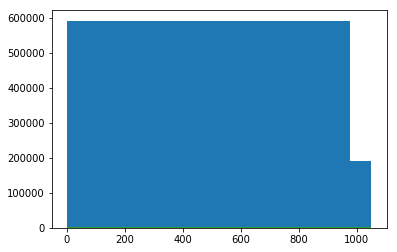

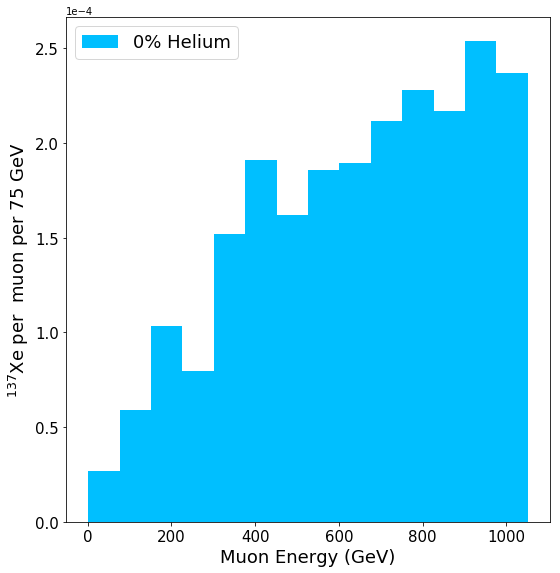

In [6]:
#binning settings
low_lim=1 #GeV
high_lim=1000 #GeV
stp_size=75


bins=np.arange(low_lim,high_lim+stp_size,stp_size)

nrgs=np.random.uniform(1,1000,7879000)
binned_nrgs=plt.hist(nrgs,bins)
binned_Xe137data=plt.hist(muonnrgsproducingXe137['Xemunrg']*10**-3,bins)
binned_neutron_muon_nrgs=plt.hist(nrgofneutroncaptured['muonnrg']*10**-3,bins)
binned_Xe137data[0].sum()

bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,8))


plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.ylabel('$^{137}$Xe per  muon per 75 GeV',fontsize=18)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15)

plt.tight_layout()
#plt.semilogy()
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]),width=stp_size,color="deepskyblue",label="0% Helium")    

print(np.sum(binned_Xe137data[0]/binned_nrgs[0])*7879000)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left")
#plt.savefig("xepermuenerg.pdf")
plt.show()


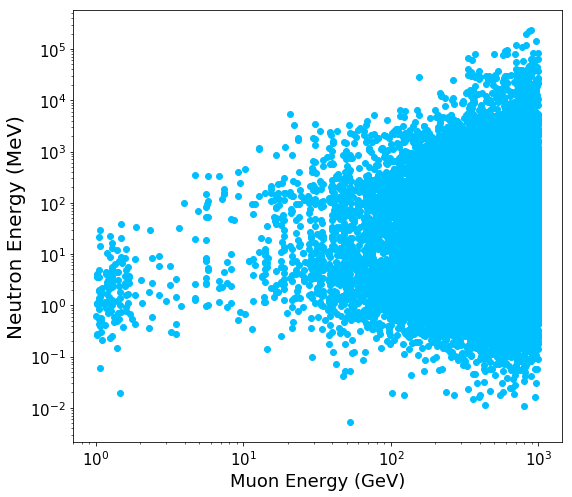

In [9]:
plt.figure(figsize=(8,7))
plt.ylabel('Neutron Energy (MeV)',fontsize=20)
plt.yticks(fontsize=15) 
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogy()
plt.semilogx()
plt.scatter(nrgofneutroncaptured['muonnrg']*10**-3,nrgofneutroncaptured['neutronnrg'],color="deepskyblue")   
#plt.savefig("nuvsmuenergies.pdf")

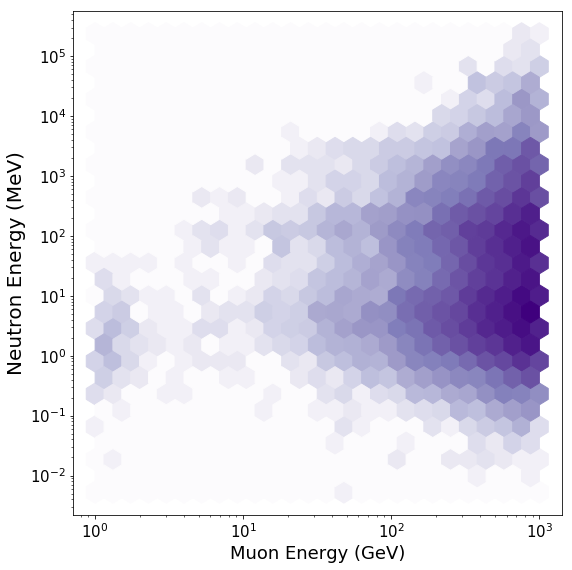

In [48]:
import matplotlib.colors as colors

X=nrgofneutroncaptured['muonnrg']*10**-3
Y=nrgofneutroncaptured['neutronnrg']

plt.figure(figsize=(8,8))
plt.ylabel('Neutron Energy (MeV)',fontsize=20)
plt.yticks(fontsize=15) 
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogy()
plt.semilogx() 

nbins = 25

plt.hexbin(X,Y, gridsize=nbins,bins='log',xscale='log',yscale='log',cmap='Purples')

#plt.savefig("nuvsmumap.pdf")

(0.002, 900000)

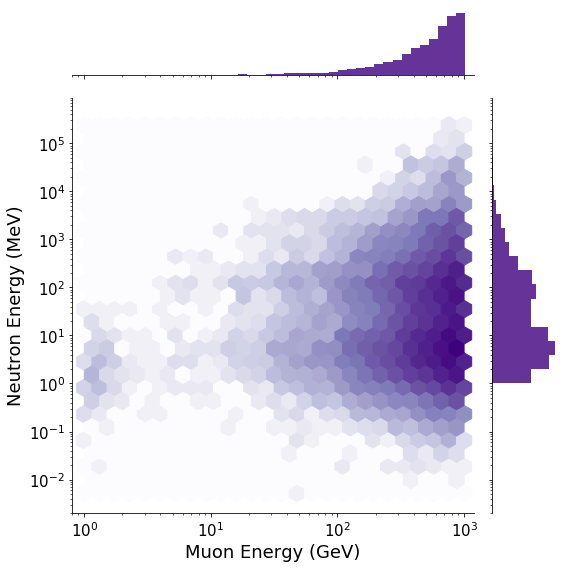

In [159]:


X=nrgofneutroncaptured['muonnrg']*10**-3
Y=nrgofneutroncaptured['neutronnrg']

nbins = 25

g = sns.JointGrid(X, Y, space=0,height=8)
g = g.plot_joint(plt.hexbin, gridsize=nbins,bins='log',xscale='log',yscale='log',cmap='Purples')
_ = g.ax_marg_y.hist(Y, color="rebeccapurple",
                      orientation="horizontal",
                      bins=np.logspace(np.log10(1),np.log10(270),20))
_ = g.ax_marg_x.hist(X, color="rebeccapurple",
                      bins=np.logspace(np.log10(1),np.log10(1200),100))

g.set_axis_labels('Muon Energy (GeV)', 'Neutron Energy (MeV)', fontsize=18)



plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.xlim(8*10**-1,1200)
plt.ylim(2*10**-3,9*10**5)

(array([14681.,  2327.,  1459.,  1112.,   896.,   769.,   656.,   523.,
          423.,   341.,   276.,   234.,   223.]),
 array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221, 241,
        261]),
 <a list of 13 Patch objects>)

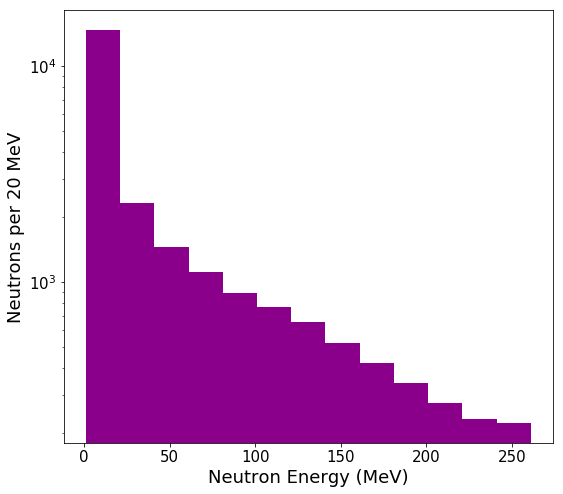

In [5]:
plt.figure(figsize=(8,7))
plt.yticks(fontsize=15) 
plt.ylabel('Neutrons per 20 MeV',fontsize=18)
plt.xlabel('Neutron Energy (MeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogy()
#plt.semilogx()

plt.hist(nrgofneutroncaptured['neutronnrg'],color="darkmagenta",bins=np.arange(1,270,20))  
#plt.savefig("nudistrib.pdf")

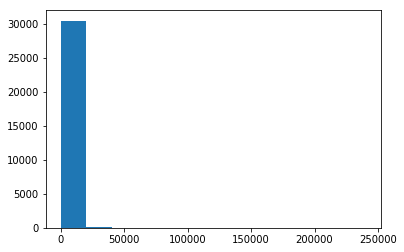

In [24]:
data=nrgofneutroncaptured['neutronnrg']
lil=10**-3
big=250000
stp_sz=20000

bins=np.arange(lil,big,stp_sz)
normival=7879000
binned_neutrons=plt.hist(data,bins)

bin_centers = bins[:-1] + np.diff(bins) / 2

In [25]:
binned_neutrons[0]/normival

array([3.86153065e-03, 9.39205483e-06, 1.52303592e-06, 1.01535728e-06,
       7.61517959e-07, 2.53839320e-07, 1.26919660e-07, 1.26919660e-07,
       0.00000000e+00, 1.26919660e-07, 0.00000000e+00, 2.53839320e-07])

0.0038751110547023734


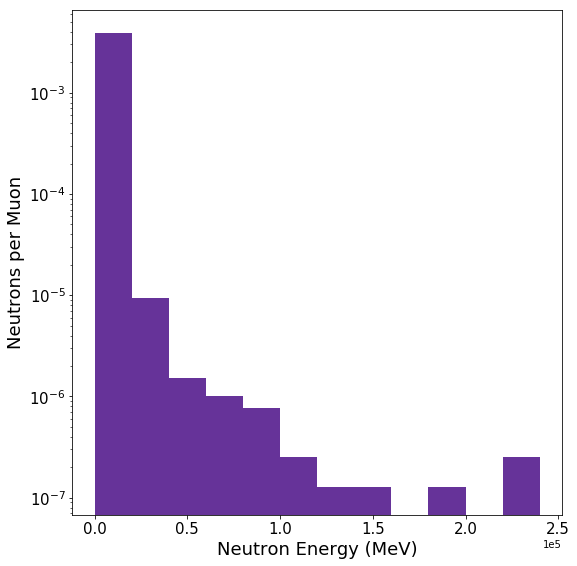

In [29]:
plt.figure(figsize=(8,8))
plt.yticks(fontsize=15) 
plt.ylabel('Neutrons per Muon',fontsize=18)
plt.xlabel('Neutron Energy (MeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogy()
#plt.semilogx()


plt.bar(bin_centers,(binned_neutrons[0]/normival),width=np.diff(bins),color="rebeccapurple")    
print(np.sum(binned_neutrons[0]/normival))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig("nudistrib_normalized.pdf")

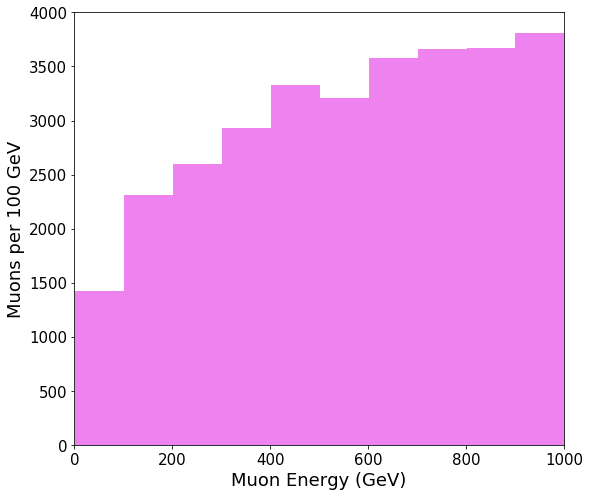

In [10]:
plt.figure(figsize=(8,7))
plt.yticks(fontsize=15) 
plt.ylabel('Neutrons per 100 GeV of Muons',fontsize=18)
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.xlim(0,1000)
plt.hist(nrgofneutroncaptured['muonnrg']*10**-3,bins=np.arange(1,1200,100),color="darkmagenta")
#plt.savefig("mudistrib.pdf")

11.973461986788427


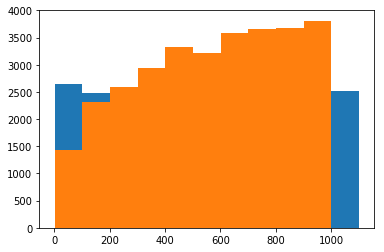

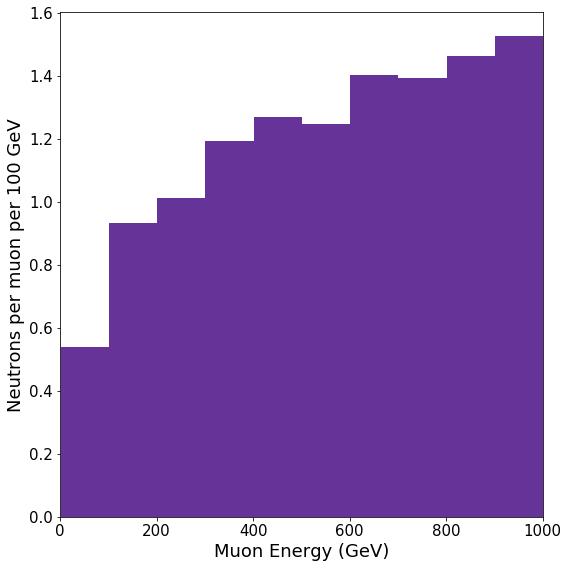

In [22]:
data=nrgofneutroncaptured['muonnrg']*10**-3
lil=1
big=1200
stp_sz=100

nrgs=np.random.uniform(lil,big,len(data))
bins=np.arange(lil,big,stp_sz)

binned_nrgs=plt.hist(nrgs,bins)
binned_muons=plt.hist(data,bins)
bin_centers = bins[:-1] + np.diff(bins) / 2

plt.figure(figsize=(8,8))
plt.yticks(fontsize=15) 
plt.ylabel('Neutrons per muon per '+str(stp_sz)+ ' GeV',fontsize=18)
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0,1000)
plt.tight_layout()
#plt.semilogy()


plt.bar(bin_centers,(binned_muons[0]/binned_nrgs[0]),width=stp_sz,color="rebeccapurple")    
print(np.sum(binned_muons[0]/binned_nrgs[0]))
plt.savefig("mudistrib_normalized.pdf")

In [163]:
#for kinE in neutrons[neutrons.mother_id==1].kin_energy.values:
            #neutronnrgs.append(kinE)
low_lim=1 #GeV
high_lim=1000 #GeV
stp_size=40
neutronnrgsbinned=[]
muonnrgsbinned=[]
neutronnrgs=[]
muonnrgs=[]


for rngs in range (low_lim,high_lim,stp_size):
    neutronnrgs=[]
    muonnrgs=[]
    if rngs <= stp_size+low_lim:
        for nrgs in nrgofneutroncaptured[nrgofneutroncaptured.muonnrg<=rngs*10**3].muonnrg.values:
            muonnrgs.append(nrgs)
            neutronnrgs.append(nrgofneutroncaptured.neutronnrg.values)
  
    else: 
        for nrgs in nrgofneutroncaptured[nrgofneutroncaptured.muonnrg<=rngs*10**3].muonnrg.values:
            muonnrgs.append(nrgs)
            neutronnrgs.append(nrgofneutroncaptured.neutronnrg.values)
      
    muonnrgsbinned.append(muonnrgs)
    neutronnrgsbinned.append(neutronnrgs)

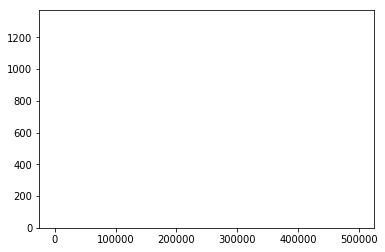

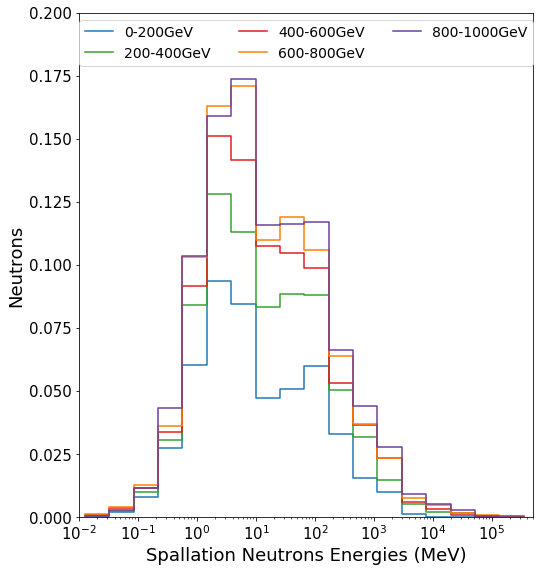

In [296]:
binsize=200000
smallbinsize=20
smallbins=np.logspace(np.log10(7*10**-3),np.log10(5*10**5),smallbinsize)
bin_centers = smallbins[:-1] + np.diff(smallbins) / 2

maxbin=1000000-binsize
x=nrgofneutroncaptured[(nrgofneutroncaptured.muonnrg<=maxbin+binsize)&(nrgofneutroncaptured.muonnrg>=maxbin)].neutronnrg  
k=plt.hist(x,bins=smallbins, histtype='step',color='white')
normfactor=np.sum(k[0])

plt.figure(figsize=(8,8))
plt.yticks(fontsize=15) 
plt.xlim(10**-2,5*10**5)
plt.ylim(0,.2)
plt.xlabel('Spallation Neutrons Energies (MeV)',fontsize=18)
plt.ylabel('Neutrons',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogx()
#plt.semilogy()


k=[]
p=0

for rngs in range (0,1000000, binsize):
    x=nrgofneutroncaptured[(nrgofneutroncaptured.muonnrg<=rngs+binsize)&(nrgofneutroncaptured.muonnrg>=rngs)].neutronnrg  
    k=plt.hist(x,bins=smallbins, histtype='step',color='white')

    plt.step(bin_centers,(k[0]/normfactor),
        label=str(int(rngs*10**-3))+"-"+str(int((rngs+binsize)*10**-3))+"GeV",
        color= palette(2*p+1),linewidth=1.5)
    p+=1
    

plt.legend(fontsize=14,ncol=3, loc="upper center")
#plt.savefig("normalizedspallationneutronenergies.pdf")

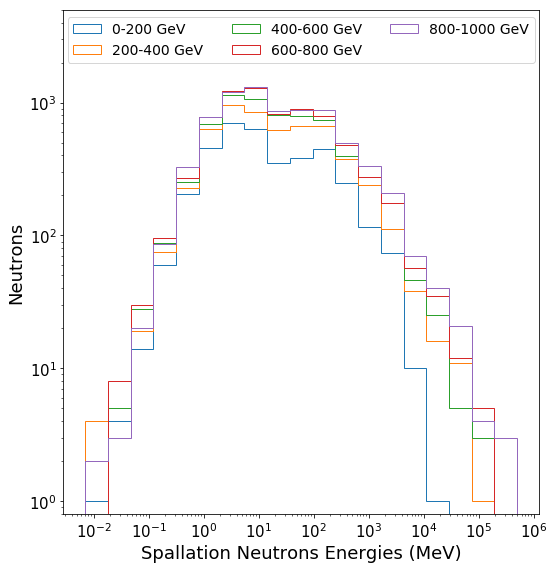

In [221]:
#nonnormalized but works
plt.figure(figsize=(8,8))
plt.yticks(fontsize=15) 
plt.ylim(8*10**-1,5*10**3)
plt.xlabel('Spallation Neutrons Energies (MeV)',fontsize=18)
plt.ylabel('Neutrons',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogx()
plt.semilogy()

smallbinsize=20
smallbins=np.logspace(np.log10(7*10**-3),np.log10(5*10**5),smallbinsize)

for rngs in range (0,1000000, binsize):
    x=nrgofneutroncaptured[(nrgofneutroncaptured.muonnrg<=rngs+binsize)&(nrgofneutroncaptured.muonnrg>=rngs)].neutronnrg
    k=plt.hist(x,bins=smallbins, histtype='step',label=str(int(rngs*10**-3))+"-"+str(int((rngs+binsize)*10**-3))+" GeV")

plt.legend(fontsize=14,ncol=3, loc="upper center")
#plt.savefig("spallationneutronenergies.pdf")

In [222]:
neutronshists=[]
nrgrng=[]
numofmu=7879000
binsize=25000
for rngs in range (0,1000000, binsize):
    x=nrgofneutroncaptured[(nrgofneutroncaptured.muonnrg<=rngs+binsize)&(nrgofneutroncaptured.muonnrg>=rngs)].neutronnrg
    neutronshists.append(x/numofmu)
    nrgrng.append(rngs+binsize/2)

In [223]:
numofmubins=1000000/binsize

#Muon energy spectrum in GranSasso
data1=np.loadtxt(locat+'muonenergiesfromgransasso.csv',delimiter=',')

sassonumofmuons=[]
#for x in range(0,len(nrgrng)):
for x in reversed(range(0,len(nrgrng))):    
    lwnrg=0
    hinrg=0
    nrg=nrgrng[x]*10**-3
    for x in range (0,len(data1)-1):
        if nrg >= data1[x][0] and nrg<= data1[x+1][0]:
            lwnrg=x
            hinrg=x+1
    if lwnrg==0 and hinrg==0: 
        print (nrg,"muon energy not within gransasso energies")
        sassonumofmuons.append(0) #DELETE THIS
    else:  
        yo=data1[lwnrg][1] #num of muons / 100 GeV bin
        y1=data1[hinrg][1]
        xo=data1[lwnrg][0] #GeV
        x1=data1[hinrg][0]
        interp_num_of_muons=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        sassonumofmuons.append(interp_num_of_muons) #number of muons expect based of Sasso spread, needs to be normalized
        
        
sassonormalizingmu=np.sum(sassonumofmuons)


987.5 muon energy not within gransasso energies
962.5 muon energy not within gransasso energies
937.5 muon energy not within gransasso energies
912.5 muon energy not within gransasso energies
887.5 muon energy not within gransasso energies
862.5 muon energy not within gransasso energies
837.5 muon energy not within gransasso energies
12.5 muon energy not within gransasso energies


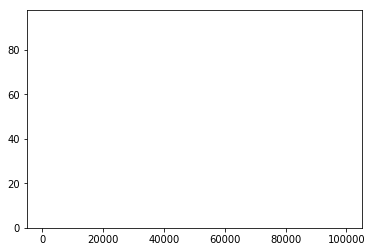

In [224]:
addedneutronenergies=[]
energies=[]

for x in range(0,len (neutronshists)):
    j=[]
    numofmuofeachenergy=sassonumofmuons[x]/sassonormalizingmu*GranSassoFluxYear
    j=plt.hist((neutronshists[x]*numofmuofeachenergy),bins=np.logspace(np.log10(10**-2),np.log10(10**5),30))
    for y in range (0,len(j[0])):
        if x==0:
            addedneutronenergies.append(j[0][y])
            energies.append(j[1][y])
        else:
            addedneutronenergies[y]+=j[0][y]

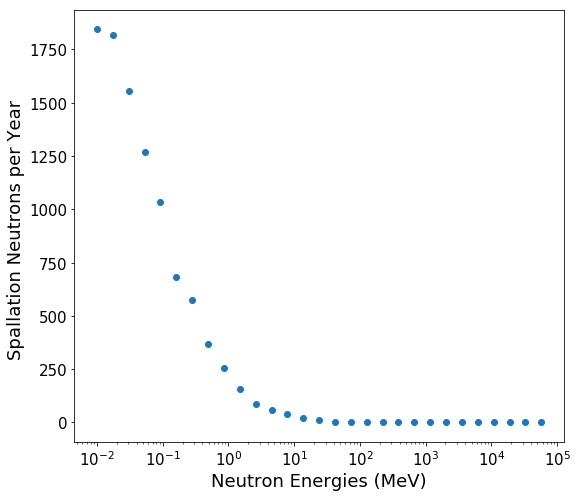

In [226]:
plt.figure(figsize=(8,7))
plt.yticks(fontsize=15) 
plt.xlabel('Neutron Energies (MeV)',fontsize=18)
plt.ylabel('Spallation Neutrons per Year ',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.semilogx()

plt.scatter(energies,addedneutronenergies) #units
plt.savefig('neutronsfrommuonsnrgssummed.pdf')


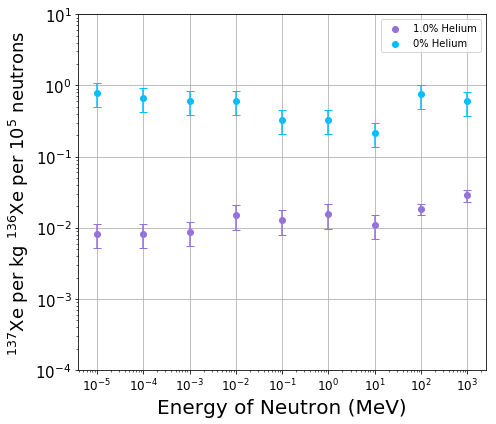

In [230]:
#num of Xe137 from neutrons
locat137='/Users/rogerslc/Development/next/nexus/' #end locations in /
numofXe_nrg=[]
numofXeHe3_nrg=[]
normalizednumofXeHe3_nrg=[]
normalizednumofXe_nrg=[]


Hefile=[]
Xefile=[]
Henrg=[]
Xenrg=[]
t=0
smallerbatch=[]
for files in glob.glob(locat137+'Xe137_1*eV.pkl'):
    Hefile.append(files)
    Henrg.append(10**((len(files)-54)/2)*10**-6)
    if Henrg[t]==10*10**-6:
        hero=t
    if Henrg[t]>=10**8*10**-6:
        smallerbatch.append(t)
    t+=1
    

t=0
for files in glob.glob(locat137+'Xe137_Xe_1*eV.pkl'):
    Xefile.append(files)   
    Xenrg.append(10**((len(files)-57)/2)*10**-6)
    if Xenrg[t]==10*10**-6:
        xero=t
    t+=1
  
numofXeHe3_nrg=[]
numofXe_nrg=[]    
for t in range(0,len(Hefile)):   
    pkl_file = open(Hefile[t], 'rb')
    numofXeHe3_nrg.append(pickle.load(pkl_file))
    pkl_file.close() 

for t in range(0,len(Xefile)):   
    pkl_file = open(Xefile[t], 'rb')
    numofXe_nrg.append(pickle.load(pkl_file))
    pkl_file.close()

eror=[]
HeError=[]
XeError=[]
pkl_file = open(locat137+'normalizederor.pkl', 'rb')
eror.append(pickle.load(pkl_file))
pkl_file.close()

for t in range (0 , len(numofXeHe3_nrg)):
    if t not in smallerbatch:
        normalizednumofXeHe3_nrg.append(numofXeHe3_nrg[t]/(5*10**3*(99)/100*.9))
        HeError.append(normalizednumofXeHe3_nrg[t]/(numofXeHe3_nrg[hero]/(5*10**3*(99)/100*.9))*eror[0][4])
    else:
        normalizednumofXeHe3_nrg.append(numofXeHe3_nrg[t]/(10**3*(99)/100*.9))
        HeError.append(normalizednumofXeHe3_nrg[t]/(numofXeHe3_nrg[hero]/(10**3*(99)/100*.9))*eror[0][2])

for t in range (0 , len(numofXe_nrg)):
    normalizednumofXe_nrg.append(numofXe_nrg[t]/(10**3*.9))
    XeError.append(normalizednumofXe_nrg[t]*eror[0][0]/(numofXe_nrg[xero]/(10**3*.9)))
    
plt.figure(figsize=(7,6))
plt.scatter(Henrg,normalizednumofXeHe3_nrg,color="mediumpurple",label="1.0% Helium")
plt.errorbar(Henrg,normalizednumofXeHe3_nrg,yerr=HeError,color="mediumpurple",capsize=4, linestyle="None")
plt.scatter(Xenrg,normalizednumofXe_nrg,color="deepskyblue",label="0% Helium")
plt.errorbar(Xenrg,normalizednumofXe_nrg,yerr=XeError,color="deepskyblue",capsize=4, linestyle="None")
plt.semilogy()
plt.semilogx()
plt.yticks(fontsize=12)  
plt.xticks(fontsize=12) 
plt.ylim(10**-4,10)    
plt.ylabel("$^{137}$Xe per kg $^{136}$Xe per $10^{5}$ neutrons",fontsize=18)
plt.yticks(fontsize=15) 
plt.xlabel('Energy of Neutron (MeV)',fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.legend()
#plt.savefig('Helium3nrgs.pdf')
plt.show()

In [231]:
xedata = pd.DataFrame({'Xenrg':Xenrg,'normalizednumofXe_nrg':normalizednumofXe_nrg}, columns = ['Xenrg', 'normalizednumofXe_nrg'])
hedata = pd.DataFrame({'Henrg':Henrg,'normalizednumofXeHe3_nrg':normalizednumofXeHe3_nrg}, columns = ['Henrg', 'normalizednumofXeHe3_nrg'])
result = xedata.sort_values(by=['Xenrg'], inplace=True)
result = hedata.sort_values(by=['Henrg'], inplace=True)
xedata = xedata.reset_index(drop=True)
hedata = hedata.reset_index(drop=True)

totalXe137=0
numofXe137inXe=[]
for x in range(0,len(energies)):
   
    lwnrg=0
    hinrg=0
    nrg=energies[x]
    
    for y in range (0,len(xedata['Xenrg'])-1):
        if nrg >= xedata['Xenrg'][y] and nrg<= xedata['Xenrg'][y+1]:
            lwnrg=y
            hinrg=y+1
    if lwnrg==0 and hinrg==0: 
        print (nrg,"neutron energy not within simulated neutron energies")
        numofXe137inXe.append(0) #DELETE THIS
    else:  
        yo=xedata['normalizednumofXe_nrg'][lwnrg] #num of Xe137
        y1=xedata['normalizednumofXe_nrg'][hinrg]
        xo=xedata['Xenrg'][lwnrg] #MeV
        x1=xedata['Xenrg'][hinrg]
        interp_num_of_Xe137=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        numofXe137inXe.append(interp_num_of_Xe137)
        

for x in range (len(numofXe137inXe)):
    totalXe137+=addedneutronenergies[x]*numofXe137inXe[x]/10**5*(10**3*.9)
print("Total Xe137 expected per year in pure Xenon= ", totalXe137) 

1172.1022975334818 neutron energy not within simulated neutron energies
2043.3597178569437 neutron energy not within simulated neutron energies
3562.2478902624443 neutron energy not within simulated neutron energies
6210.169418915616 neutron energy not within simulated neutron energies
10826.36733874054 neutron energy not within simulated neutron energies
18873.918221350996 neutron energy not within simulated neutron energies
32903.44562312671 neutron energy not within simulated neutron energies
57361.52510448681 neutron energy not within simulated neutron energies
Total Xe137 expected per year in pure Xenon=  42.332653842823184


In [232]:
totalXe137_He3=0
numofXe137inXeHe=[]
for x in range(0,len(energies)):
   
    lwnrg=0
    hinrg=0
    nrg=energies[x]
    
    for y in range (0,len(hedata['Henrg'])-1):
        if nrg >= hedata['Henrg'][y] and nrg<= hedata['Henrg'][y+1]:
            lwnrg=y
            hinrg=y+1
    if lwnrg==0 and hinrg==0: 
        print (nrg,"neutron energy not within simulated neutron energies")
        numofXe137inXeHe.append(0) #DELETE THIS
    else:  
        yo=hedata['normalizednumofXeHe3_nrg'][lwnrg] #num of Xe137
        y1=hedata['normalizednumofXeHe3_nrg'][hinrg]
        xo=hedata['Henrg'][lwnrg] #MeV
        x1=hedata['Henrg'][hinrg]
        interp_num_of_Xe137=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        numofXe137inXeHe.append(interp_num_of_Xe137)
        

for x in range (len(numofXe137inXeHe)):
    totalXe137_He3+=addedneutronenergies[x]*numofXe137inXeHe[x]/10**5*(10**3*.9)
print("Total Xe137 expected per year in Xenon Helium mix= ", totalXe137_He3) 

1172.1022975334818 neutron energy not within simulated neutron energies
2043.3597178569437 neutron energy not within simulated neutron energies
3562.2478902624443 neutron energy not within simulated neutron energies
6210.169418915616 neutron energy not within simulated neutron energies
10826.36733874054 neutron energy not within simulated neutron energies
18873.918221350996 neutron energy not within simulated neutron energies
32903.44562312671 neutron energy not within simulated neutron energies
57361.52510448681 neutron energy not within simulated neutron energies
Total Xe137 expected per year in Xenon Helium mix=  1.2542555203133035


In [35]:
print("Total Xe137 expected per year in pure Xenon= ", totalXe137) 
print("Total Xe137 expected per year in Xenon Helium mix= ", totalXe137_He3) 

Total Xe137 expected per year in pure Xenon=  39.55861345379397
Total Xe137 expected per year in Xenon Helium mix=  1.1745507290711523


863.5 muon energy not within gransasso energies
938.5 muon energy not within gransasso energies
1013.5 muon energy not within gransasso energies


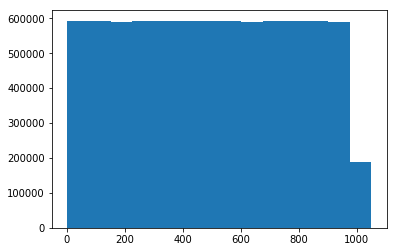

In [316]:
#binning settings
low_lim=1 #GeV
high_lim=1000 #GeV
stp_size=75

bins=np.arange(low_lim,high_lim+stp_size,stp_size)
nrgs=np.random.uniform(1,1000,7879000)
binned_nrgs=plt.hist(nrgs,bins)
binned_Xe137data=plt.hist(muonnrgsproducingXe137['Xemunrg']*10**-3,bins)

numofXe137=binned_Xe137data[0] #number in each energy bin
nrgstobin=binned_Xe137data[1] #energies need to normalize with

numofmubins=1000000/stp_size

#Muon energy spectrum in GranSasso
data1=np.loadtxt(locat+'muonenergiesfromgransasso.csv',delimiter=',')

proper_nrgs=[]
for x in range(0,len(nrgstobin)-1):
    
    lwnrg=0
    hinrg=0
    nrg=nrgstobin[x]+stp_size/2
    
    for y in range (0,len(data1)-1):
        if data1[y][0] < nrg< data1[y+1][0]:
            lwnrg=y
            hinrg=y+1
    if lwnrg==0 and hinrg==0:            
        print (nrg,"muon energy not within gransasso energies")
        proper_nrgs.append(1000) #DELETE THIS
    else:  
        yo=data1[lwnrg][1] #num of muons / 100 GeV bin
        y1=data1[hinrg][1]
        xo=data1[lwnrg][0] #GeV
        x1=data1[hinrg][0]
        interp_num_of_muons=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        proper_nrgs.append(interp_num_of_muons) #number of muons expect based of Sasso spread, needs to be normalized

        
sassonormalizingmu=np.sum(proper_nrgs)

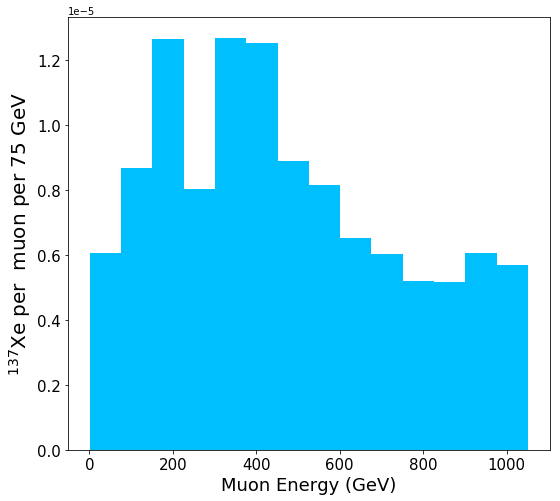

In [329]:
bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,7))
plt.ylabel('$^{137}$Xe per  muon per '+str(stp_size)+ ' GeV',fontsize=20)
plt.yticks(fontsize=15) 
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
#plt.semilogx()
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]*proper_nrgs/sassonormalizingmu),width=stp_size,color="deepskyblue")    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("xepermuenerg_normalized.pdf")

In [274]:
comparXe137=0
for x in range (0, len(binned_Xe137data[0])):
    comparXe137+=binned_Xe137data[0][x]/binned_nrgs[0][x]*proper_nrgs[x]/sassonormalizingmu
    
print ("number of Xe137 per year =", comparXe137*GranSassoFluxYear)

number of Xe137 per year = 8.173643794043706


In [267]:
binned_Xe137data[0]

array([  7.,  20.,  24.,  44.,  29.,  35.,  65.,  62.,  76.,  74.,  48.,
        84.,  66.,  94.,  77.,  81.,  94.,  88., 107.,  88.])

In [268]:
data1[0][0]

26.20113262